In [471]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [472]:
# Import dataset
# path ='dataset/'
path = '/content/'
df = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)


Number of rows and columns in the data set:  (1338, 7)


In [473]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [474]:
# desribe the dataset (Exploratory data analysis) 
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


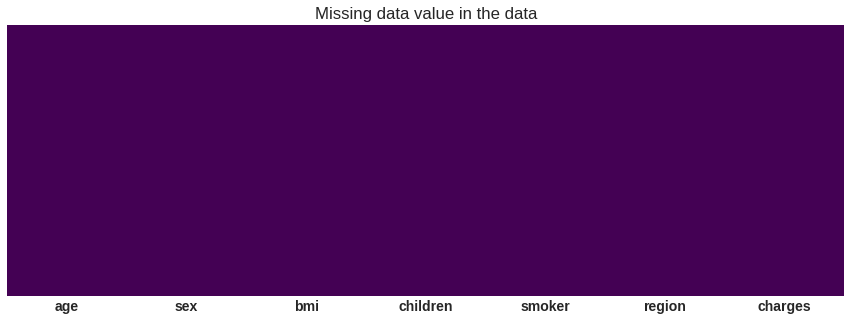

In [476]:
#Check for missing value
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing data value in the data');

In [477]:
# To find the correlation among the columns
corr_p = df.corr(method ='pearson') #'pearson’, ‘kendall’, ‘spearman'
corr_p

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


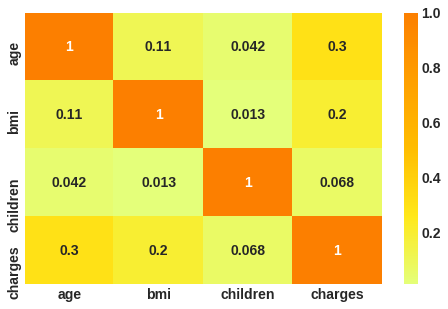

In [478]:
# correlation plot
sns.heatmap(corr_p, cmap = 'Wistia', annot= True);

from Kendall method


In [479]:
corr_k = df.corr(method ='kendall') #'pearson’, ‘kendall’, ‘spearman'
corr_k

,age,bmi,children,charges
age,1.000000,0.073273,0.043253,0.475302
bmi,0.073273,1.000000,0.011562,0.082524
children,0.043253,0.011562,1.000000,0.103107
charges,0.475302,0.082524,0.103107,1.000000


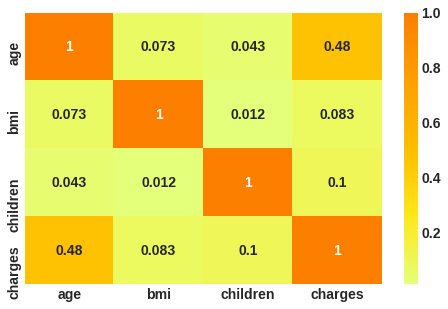

In [480]:
# correlation plot for kendall method
sns.heatmap(corr_k, cmap = 'Wistia', annot= True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


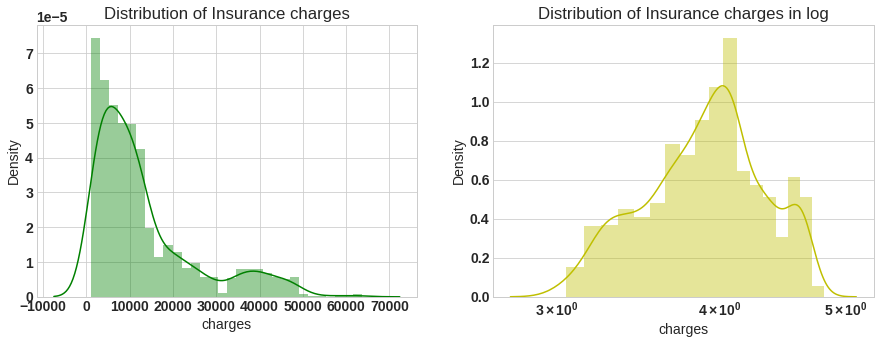

In [481]:
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.distplot(df['charges'],color='g',ax=ax)
ax.set_title('Distribution of Insurance charges')
ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),color='y',ax=ax)
ax.set_title('Distribution of Insurance charges in log')
ax.set_xscale('log');

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

lable encoding 

In [482]:
df["sex"] = df["sex"].astype('category')
df["smoker"] = df["smoker"].astype('category')
df["region"] = df["region"].astype('category')


In [483]:
df["sex"] = df["sex"].cat.codes
df["smoker"] = df["smoker"].cat.codes
df["region"] = df["region"].cat.codes

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [484]:
# Log transform of dependent variable
df['charges'] = np.log(df['charges'])

In [485]:
#Train Test split
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1)
y = df['charges'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=35)

#Model building

In [486]:
# Step 1: add x0 =1 to dataset
X_train_theta = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_theta = np.c_[np.ones((X_test.shape[0],1)),X_test]
# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_theta.T,X_train_theta) ), np.matmul(X_train_theta.T,y_train)) 
# The parameters for linear regression model
all_theta = []
for i in range(X_train_theta.shape[1]):
  all_theta.append('theta-'+str(i))
feachers = ['intersect:x_0=1'] + list(X.columns.values)
df_feachers = pd.DataFrame({'All_thetas':all_theta,'feachers':feachers,'theta':theta})
df_feachers

,All_thetas,feachers,theta
0,theta-0,intersect:x_0=1,7.057936
1,theta-1,age,0.034390
2,theta-2,sex,-0.087236
3,theta-3,bmi,0.011996
4,theta-4,children,0.108142
5,theta-5,smoker,1.551346
6,theta-6,region,-0.047787


In [487]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#Parameter
sk_theta = [lr.intercept_]+list(lr.coef_)
df_feachers = df_feachers.join(pd.Series(sk_theta, name='sk_theta'))
df_feachers


,All_thetas,feachers,theta,sk_theta
0,theta-0,intersect:x_0=1,7.057936,7.057936
1,theta-1,age,0.034390,0.034390
2,theta-2,sex,-0.087236,-0.087236
3,theta-3,bmi,0.011996,0.011996
4,theta-4,children,0.108142,0.108142
5,theta-5,smoker,1.551346,1.551346
6,theta-6,region,-0.047787,-0.047787


#Model evaluation

In [488]:
# prediction
y_pred =  np.matmul(X_test_theta,theta) 

#Evaluvation: MSE (Write your MSE equation from scratch)
J_mse = np.sum((y_pred - y_test)**2)/ (X_test_theta.shape[0])

In [493]:
y_pred

array([ 8.94475364, 10.93948545,  9.07386417,  8.47539114,  8.74547324,
        9.57074278,  9.36186953,  8.27881449,  8.55089703,  9.16963447,
        9.83657064,  9.01828823,  9.24362257,  9.04907803,  9.248443  ,
       10.10282615,  9.62126293,  8.02680987,  9.36100817,  9.39094375,
        9.01486293,  8.63204278,  8.98589041,  9.52016114,  8.72232384,
       10.24665347,  9.91741398,  9.98213078,  8.84530351, 10.27730738,
        8.11966958,  8.05667601,  9.05683797,  9.27695383,  9.59630468,
        9.18052771,  9.97570144,  9.22751379, 10.80351737,  8.40825465,
        9.19904378,  8.98179134,  8.45043585,  8.43525173,  9.49283646,
       10.96637175, 11.2381535 ,  9.73913245,  9.36187366,  9.76941641,
        9.75186492,  8.11255678,  8.65512676,  9.20752497,  8.32974079,
        7.83077293,  8.186985  ,  9.9096339 ,  9.30701784,  8.65154362,
        9.22942543,  9.52168897,  8.08085109,  8.75972343,  9.78439621,
        9.08736125,  9.48806542,  8.46923821,  8.4098785 ,  8.61

In [489]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.19924245957248024


In [490]:
# sklearn regression module
y_pred_sk = lr.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error as mse
J_mse_sk = mse(y_pred_sk, y_test)

In [494]:
y_pred_sk

array([ 8.94475364, 10.93948545,  9.07386417,  8.47539114,  8.74547324,
        9.57074278,  9.36186953,  8.27881449,  8.55089703,  9.16963447,
        9.83657064,  9.01828823,  9.24362257,  9.04907803,  9.248443  ,
       10.10282615,  9.62126293,  8.02680987,  9.36100817,  9.39094375,
        9.01486293,  8.63204278,  8.98589041,  9.52016114,  8.72232384,
       10.24665347,  9.91741398,  9.98213078,  8.84530351, 10.27730738,
        8.11966958,  8.05667601,  9.05683797,  9.27695383,  9.59630468,
        9.18052771,  9.97570144,  9.22751379, 10.80351737,  8.40825465,
        9.19904378,  8.98179134,  8.45043585,  8.43525173,  9.49283646,
       10.96637175, 11.2381535 ,  9.73913245,  9.36187366,  9.76941641,
        9.75186492,  8.11255678,  8.65512676,  9.20752497,  8.32974079,
        7.83077293,  8.186985  ,  9.9096339 ,  9.30701784,  8.65154362,
        9.22942543,  9.52168897,  8.08085109,  8.75972343,  9.78439621,
        9.08736125,  9.48806542,  8.46923821,  8.4098785 ,  8.61

In [491]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1992424595724774


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' Actual Vs Predicted value from sklearn')

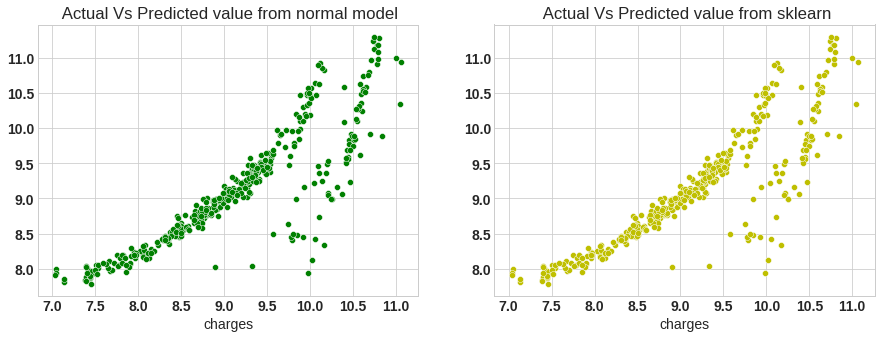

In [492]:
# Check for Linearity
f = plt.figure(figsize=(15,5))
# from normal prediction
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='g')
ax.set_title(' Actual Vs Predicted value from normal model')
# from sklearn prediction
ax = f.add_subplot(122)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='y')
ax.set_title(' Actual Vs Predicted value from sklearn')
